## Desarollos guía: Particula en una caja 1D

In [2]:
import qcelemental as qcel
import numpy as np
from sympy import *
from scipy import integrate as integracion_num

c = qcel.constants.c
h = qcel.constants.h
me= qcel.constants.me
hbar =qcel.constants.hbar
pi = np.pi
avog = qcel.constants.get("Avogadro constant")
J2kJmol = avog/1000

### Ejercicio 1

¿Cuál de las siguientes funciones son funciones propias de los operadores? 

$$ \hat{A} = \frac{d}{dx} \qquad \hat{B} = \frac{d^2}{dx^2}$$

$$ e^{ax} \quad e^{ax^2}\quad x^2 \quad \sin(x) $$


    

**Solución:**

Recordemos que una función es función propia de un operador si se cumple que:

\begin{equation} \hat{A}f(x) = af(x), \end{equation}

donde $\hat{A}$ corresponde a un operador y $a$ es un escalar.  
El primer operador es el operador que analizamos el el operadaor primera derivada. Por lo tanto solamente las funciones que no se ven modificadas en su forma serán funciones propias del operador. Eso solamente se cumple para la función $e^{ax}$ ya que:

$$ \frac{d}{dx}e^{ax} = ae^{ax} $$

Comparando con la ecuación (1) claramente se cumple la condición de función propia. Para el operador segundo derivada tenenmos el siguiente resultado:

$$ \frac{d^2}{dx^2}e^{ax} = \frac{d}{dx}ae^{ax} = a²e^{ax} \quad\text{Valor Propio = } a² $$
$$ \frac{d^2}{dx^2}e^{ax^2} = \frac{d}{dx}2axe^{ax²} = 2ae^{ax²} + 2a²e^{ax²} \quad\text{No es función propia} $$
$$ \frac{d^2}{dx^2}x^2 = 0 \quad \text{No es función propia}$$
$$ \frac{d^2}{dx^2}\sin(x) = \frac{d}{dx}\cos(x) = -\sin(x) \quad\text{Valor Propio = } -1$$


### Ejercicio 2

Construya los operadores mecano-cuánticos para los siguientes observables:

(a) Energía cinética en tres dimensiones

(b) La distancia inversa

(c) El momento dipolar electrico


**Solución:**

Según el tercer postulado de la mecánica cuántica, es posible construir cualquier operador mecano-cuántico a partir de los operadores de posición y momentum:

$$ \hat{x} = x \qquad \hat{p_x} = -i\hbar\frac{d}{dx} $$

Estos operadores se reemplazan en la expresión clásica del observable y de esa forma se obtiene el operador.
Por ejemplo la energía cinética en tres dimensiones está dada por:

$$ E = E_x + E_y + E_z = \frac{p_x^2}{2m} + \frac{p_y^2}{2m}  +\frac{p_z^2}{2m}  $$

Por lo tanto en este caso debemos reemplazar el momento lineal por el operador momento lineal para poder obenter el operador cuántico, lo hacemos para una dimensión solamente ya que la expresión es igual para las tres dimensiones.

$$\hat{T_x} = \frac{(-i\hbar\frac{d}{dx})²}{2m} = i²\frac{\hbar²}{2m}\frac{d²}{dx²} = -\frac{\hbar²}{2m}\frac{d²}{dx²} $$

Finalemnte:

$$\hat{T} = \hat{T_x} + \hat{T_y} + \hat{T_z} = -\frac{\hbar²}{2m}\frac{d²}{dx²}  -\frac{\hbar²}{2m}\frac{d²}{dy²} -\frac{\hbar²}{2m}\frac{d²}{dz²} $$ 


*(b)*  La distancia inversa simplemente corresponde al operador:

$$ 1/\hat{x} $$

Cabe mencionar que el postulado 3 aplica una posición en cualquier set de coordandas, pueden ser cartesianes ($x,y,z$) o polares ($r, \theta, \phi$)

*(c)* El momento diplar electrico  está definido por la distribución de cargas en el espacio. En el caso de cargas puntuales tenemos que:

$$ \mu = \sum_i^N q_ir_i $$ 

Por lo tanto el operador que debemos reemplazar es el operador posición y nos queda como:


$$ \hat{\mu} = \sum_i^N q_i\hat{r_i} $$ 




### Ejercicio 3

Evalue los siguientes conmutadores: $[x,y], [x^2,p_x], [\frac{1}{x}, p_x]$.

**Solución:** La mejor estrategia para evaluar un conmudador y determinar su valor es utilizar una función prueba y analizar si el conmutador se anula o no.

$$ [x,y] g(x) = xg(x)y - xyg(x) = xyg(x) - xyg(x) = 0  $$

En este primer ejemplo, x e y claramente conmutan ya que el conmutador es 0. 

\begin{align}
[x²,p_x]g(x) &= x²i\hbar\frac{d}{dx} g(x) - i\hbar\frac{d}{dx}(x² g(x))\\
&= i\hbar\left(x²g'(x) - 2xg(x) - x^2 g'(x)\right) \\
&=  -i\hbar2xg(x)
\end{align}

Eliminado la función de prueba arbitraria tenemos que:

$$ [x²,p_x] = -2i\hbar x $$

Por lo tanto los operadores no conmutan.

\begin{align}
[1/x,p_x]g(x) &= \frac{1}{x}i\hbar\frac{d}{dx} g(x) - i\hbar \frac{d}{dx}\left(\frac{1}{x}g(x)\right)\\
&= i\hbar\left(\frac{1}{x}g'(x) + \frac{1}{x²}g(x) - \frac{1}{x}g'(x)\right) \\
&=  i\hbar x^{-2}g(x)
\end{align}

Por lo tanto nuevamente no conmutan.

### Ejercicio 4

Calcule el valor esperado una particula  en una caja descrita por la función de onda:
\begin{equation*}
	\phi(x)=\left(\frac{630}{l^9}\right)^{1/2} x^2(l-x)^2
\end{equation*}
Explique por qué la particula con esta función de onda presenta una dispersión en la energía.

**Solución:**

Este es un ejercico un poco más avanzando pero muy interesante. Nos pide calcular la desviación estandar en la energía para una función de onda que no es función propia del Hamiltoniano de la partícula en caja 1-D. Como no es función propia, si una partícual se encuentra en una estado descrito por esa función de onda, su energía debería variar con respecto a la energía exacta para un estado determiando. Eso es justamente lo que vamos a determinar en este ejercicio. Empecemos graficando la función $\phi(x)$ para analizar que tan bien describe el estado fundamenal del la partícula en una caja.

In [3]:
def phi(x):
    l=1.0
    return np.sqrt(630/l**9) * x**2 * x*(l-x)**2 

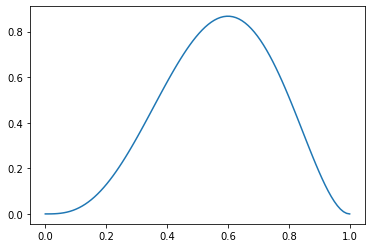

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)


#phi(1.)
plt.plot(x, phi(x));

Podemos ver que efectivamente se asemeja la la función de onda en el estado fundamental. Es si está un poco desplazada hacia el extremo derecho de la caja. 

Procedamos entonces a calcular la desviación estándard en la energía. 
Para eso debemos obtener el valor esperado de la energía $<E>$ y también el valor esperado del cuadrado de la energía $<E²>$. Empecemos por el más simple que es el valor esperado de la energía. Recordemos que el postulado IV nos indica que para una función de onda normalizada, tenemos que el valor esperado de un observable $A$ está dado por:

$$<A> = \int \psi(x)\hat{A} \psi(x) d\tau $$

donde la integración es sobre todo el espacio. En el caso que estamos analizando la integración es sobre $x$ y el operador en cuestión es el operador de energía, es decri el operado Hamiltoniano. 

$$ \hat{H} = -\frac{\hbar²}{2m}\frac{d²}{dx²} $$

Por lo tanto debemos resolver la integral: 

$$<E> = \int_0^l \phi(x)\hat{H} \phi(x) dx $$

\begin{align}
<E> &= \int \left(\frac{630}{l^9}\right)^{1/2} x^2(l-x)^2 \left(-\frac{\hbar²}{2m}\frac{d²}{dx²} \right) \left(\frac{630}{l^9}\right)^{1/2} x^2(l-x)^2 dx\\
    &= -\frac{\hbar²}{2m}\frac{630}{l^9} \int x^2(l-x)^2 \left(\frac{d²}{dx²} \right) x^2(l-x)^2 dx \\
    &= -\frac{\hbar²}{2m}\frac{630}{l^9} \int x^2(l-x)^2 \left(\frac{d}{dx} \right) \Big( 2x(l-x)² - 2x²(l-x) \Big) dx \\
    &= -\frac{\hbar²}{2m}\frac{630}{l^9} \int x^2(l-x)^2 \Big( (2(x-l)² - 2x2(l-x) - 4x(l-x) + 2x² \Big) dx \\
    &= -\frac{\hbar²}{2m}\frac{630}{l^9} \int x^2(l-x)^2 \Big( (2(l-x)² - 8x(l-x) + 2x² \Big) dx
\end{align}



\begin{align}
 &= -\frac{\hbar²}{2m}\frac{630}{l^9} \int_0^l 2x^2(l-x)^4 - 8x²(x-l)³ + 2x²(x-l)² dx \\
 &= -\frac{\hbar²}{m}\frac{630}{l^9} \left(\int_0^l x^2(l-x)^4dx -  \int_0^l 4x³(l-x)³dx + \int_0^l x⁴(l-x)² dx \right) \\
\end{align}

Ahora solamente nos falta calcular esas tres integrales, las llamaremos i1, i2 e i3 respectivamente. 

In [5]:
init_printing(use_unicode=False, wrap_line=False)

x = Symbol('x', nonzero=True)
l = symbols('l', nonzero=True)
int1 = x**2 * (l-x)**4
int2 = -4 * x**3 * (l-x)**3
int3 = x**4 * (l-x)**2

In [6]:
i1 = integrate(int1, (x, 0, l))
i1.simplify()

In [7]:
i2 = integrate(int2, (x, 0, l))
i2.simplify()

In [8]:
i3 = integrate(int3, (x, 0, l))
i3.simplify()

Finalmente tenemos que:

\begin{align}
 &= -\frac{\hbar²}{m}\frac{630}{l^9} \left(\frac{l⁷}{105} -  \frac{l⁷}{35} + \frac{l⁷}{105} \right) \\
 &=6\frac{\hbar²}{ml²} \\
 &=\frac{6}{4\pi²}\frac{h²}{ml²} = 0.1519\frac{h²}{ml²}
\end{align}  

Comparemos este resultado  con el valor de energía exacto
del estado fundamental de una caja 1-D:

\begin{align}
     E_1 &= \frac{h^2}{8ml^2} = 0.125\frac{h²}{ml²}
\end{align}

Podemos conculir que La energía es similar pero un poco mayor que la energía exacta. Recordemos además que lo que acabamos de calcular es un valor esperado es decir que si una partícula se encuentra en el estado $\phi(x)$ y repito una medición de la energía varias veces en promedio vamos a obener la energía calculado, sin embargo esta puede variar de medición a medición, sin embargo si la partícual se encuentra en el estado de energía determinada $\psi_1(x)$ cuando hacemos una medición de la energía SIEMPRE voy a obtener la energía $E_1$.

Finalmente este resultado no nos entrega mayor información sobre la dispersion promedio de valores de energía cuando se encuentran en este estado, 
pero ahora que concemos el promedio podemos calcular la desviación estándard de ese estado.

### Ejercicio 5

Considerando los resultados del ejercicio anterior,
calcule el valor de $\sigma_E = (\langle E^2 \rangle - \langle E \rangle^2)^{1/2}$ para  una particula  en una caja descrita por la función de onda:

\begin{equation*}
	\phi(x)=\left(\frac{630}{l^9}\right)^{1/2} x^2(l-x)^2
\end{equation*}

Explique por qué la particula con esta función de onda presenta una dispersión en la energía.

**Solución:**
    
Ya conocemos el resultado del promedio $<E>$ de una PEC 1-D en este estado por lo tanto solamente necesitamos calcular el valor de $<E²>$.
Antes de escribir la integral vamos a recordar y calcular unas derivadas que necesitamos para el calculo de este valor esperado:

\begin{align}
\frac{d²}{dx²} \phi(x) & = 2(l-x)² - 8x(l-x) + 2x² \\
                       & = 2l² - 4lx + 2x² -8lx +8x² + 2x² \\
                       & =  12x² - 12lx + 2l² \\
\frac{d³}{dx³} \phi(x) & = 24x - 12l \\
\frac{d⁴}{dx⁴} \phi(x) & = 24  \\
\end{align}

Muchas veces, sobre todo para funciones más complejas es conveniente anotar las derivadas de las funciones de forma independiente y reemplazarlas al momento adecuado en la integral. 

La integral que debemos calcular es la siguiente:

$$ <E²> = \int_0^l \phi(x)^* \hat{H}² \phi(x) dx $$

reemplazamos entonces por el operador y la función de onda:

\begin{align}
<E²> &=  \left(\frac{630}{l^9}\right) \int x^2(l-x)^2 \left(-\frac{\hbar²}{2m}\frac{d²}{dx²} \right) \left(-\frac{\hbar²}{2m}\frac{d²}{dx²} \right) x^2(l-x)^2 dx\\
&= \left(\frac{630}{l^9}\right) \int x^2(l-x)^2 \frac{\hbar⁴}{4m²}\frac{d⁴}{dx⁴} x^2(l-x)^2 dx\\
&= \left(\frac{630}{l^9}\right) \int x^2(l-x)^2 \frac{\hbar⁴}{4m²}24 dx\\
&= \left(\frac{3780\hbar⁴}{m²l^9}\right) \int_0^l x^2(l-x)^2 dx\\
 \end{align}
 
Solo nos falta evaluar la integral:

In [9]:
int4 = x**2 * (l-x)**2

i4 = integrate(int4, (x, 0, l))
i4.simplify()

Reemplazando obetenemos:
    
$$ <E²> = \frac{3780\hbar⁴}{m²l^9} \frac{l⁵}{30} =  \frac{126\hbar⁴}{m²l^4} $$

El último paso es calcular la desviación estándar:

\begin{align}
\sigma_E &= \left(\langle E^2 \rangle - \langle E \rangle^2\right)^{1/2}\\
         &=  \left(  \frac{126\hbar⁴}{m²l^4} -  \frac{36\hbar⁴}{m²l^4} \right)^{1/2}\\
         &=  \sqrt{\frac{90\hbar⁴}{m²l^4}} = \sqrt{90}\frac{\hbar²}{ml²} = \frac{\sqrt{90}}{4\pi²}\frac{h²}{ml²}
         &= 0.240\frac{h²}{ml²}
\end{align}

Como pueden ver, aunque el promedio es solamente un poco mayor que el valor exacto, la desviación estándard es bastante grande tal que una medición de la energía en ese estado puede dar valores muy dispersos alrededor de ese promedio. En el próximo ejercico se ilustra los resultdaos con un ejemplo numérico.

### Ejercicio 6: 

Calcule el valor medio de la energía y la desviación estándar en la energía de un electrón en una caja 1-D de largo $0.1 nm$ que se encuentra en un estado:

\begin{equation*}
	\phi(x)=\left(\frac{630}{l^9}\right)^{1/2} x^2(l-x)^2
\end{equation*}

La masa de un proton es: $1.6762\times10^{-27} $kg.  Exprese  el resultado final en electronvoltios.

Ya obtuvimos una expresión para el valor medio de la energía, ahora podemos utilizarla para este problema

$$ \langle E \rangle = 6\frac{\hbar²}{ml²}  \qquad \sigma_E = \sqrt{\frac{90\hbar⁴}{m²l⁴}} $$

In [41]:
l = 1.0e-10 # en m
#m = qcel.constants.proton_mass
m = me

#E_e = h**2 / (8 * m * l**2) #* qcel.constants.conversion_factor("J", "eV")

E = 6 * hbar**2 / (m * l**2) * qcel.constants.conversion_factor("J", "eV")
sig = np.sqrt(90 * hbar**4 / (m**2 * l**4)) * qcel.constants.conversion_factor("J", "eV")

print("El valor medio de la energía es: {} eV y la desviacion estandar del promedio es: {} eV".format(E, sig))

El valor medio de la energía es: 45.71978495066045 eV y la desviacion estandar del promedio es: 72.28932728858803 eV
